Лабораторная работа №10

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# 1. Загрузите данные с помощью библиотеки sklearn.

X, Y = load_boston(return_X_y=True)

In [6]:
# 2. Разделите выборку на обучающую (75%) и контрольную (25%).

size_Y = int(len(Y)* 0.75)
size_X = int(len(X)* 0.75)

X_test = X[size_X:]
Y_test = Y[size_Y:]
X = X[:size_X]
Y = Y[:size_Y]

In [7]:
# 3. Заведите массив для объектов DecisionTreeRegressor и для вещественных чисел


tree_array = [DecisionTreeRegressor(max_depth=5, random_state=42) for _ in range(50)]
factor_array = [0.9]*50

In [8]:
# 4. В цикле обучите последовательно 50 решающих деревьев с параметрами max_depth=5 и random_state=42
# 5. Попробуйте всегда брать коэффициент равным 0.9.
# 6. В процессе реализации обучения вам потребуется функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X. Реализуйте ее.

def predict(data, factors, trees):
    results = []
    for row in data:
        result = 0
        for i in range(len(trees)):
            result += trees[i].predict([row])[0] * factors[i]
        results.append(result)
    return np.array(results)

def fit_trees(data, y, trees, factors):
    errors = y[:]
    for i, tree in enumerate(trees):
        tree.fit(data, errors)
        errors = -(predict(data, factors, trees[:i + 1]) - y)

fit_trees(X, Y, tree_array, factor_array)
result = predict(X_test, factor_array, tree_array)
print("Среднеквадратичное отклонение: ", mean_squared_error(y_pred=result, y_true=Y_test, squared=False))


Среднеквадратичное отклонение:  5.455623403859612


In [9]:
# 7. Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации (от 0 до 49). Какое получилось качество на контрольной выборке?

factor_array = [0.9 / (1 + i) for i in range(50)]
fit_trees(X, Y, tree_array, factor_array)
result = predict(X_test, factor_array, tree_array)
print("Среднеквадратичное отклонение: ", mean_squared_error(y_pred=result, y_true=Y_test, squared=False))

Среднеквадратичное отклонение:  4.812550945781193


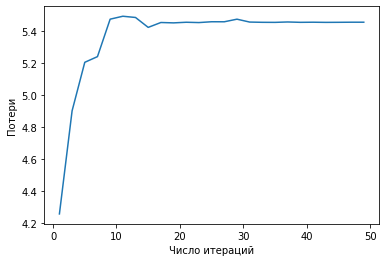

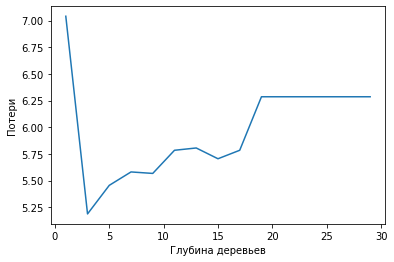

In [10]:
# 8. Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций, а также с ростом глубины деревьев. Постройте графики. Какие выводы можно сделать?

factor_array = [0.9]*50
costs = []
tree_count = range(1, 51, 2)

for tree_number in tree_count:
    tree_array = [DecisionTreeRegressor(max_depth=5, random_state=42) for _ in range(tree_number)]
    fit_trees(X, Y, tree_array, factor_array)
    result = predict(X_test, factor_array, tree_array)
    costs.append(mean_squared_error(y_pred=result, y_true=Y_test, squared=False))

plt.plot(tree_count, costs)
plt.xlabel("Число итераций")
plt.ylabel("Потери")
plt.show()

costs = []
depths = range(1, 31, 2)

for depth in depths:
    tree_array = [DecisionTreeRegressor(max_depth=depth, random_state=42) for _ in range(50)]
    fit_trees(X, Y, tree_array, factor_array)
    result = predict(X_test, factor_array, tree_array)
    costs.append(mean_squared_error(y_pred=result, y_true=Y_test, squared=False))

plt.plot(depths, costs)
plt.xlabel("Глубина деревьев")
plt.ylabel("Потери")
plt.show()



In [11]:
# 9. Сравните качество, получаемое с помощью градиентного бустинга с качеством работы линейной регрессии.

linear_regression = LinearRegression()
linear_regression.fit(X, Y)
print("Среднеквадратичное отклонение: ", mean_squared_error(y_pred=linear_regression.predict(X_test), y_true=Y_test, squared=False))

Среднеквадратичное отклонение:  8.25497975354908
